In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv("C:/Users/suraj/Desktop/ExcelR/Assignment 5 multi linear regression/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.shape

(50, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.duplicated().sum()

0

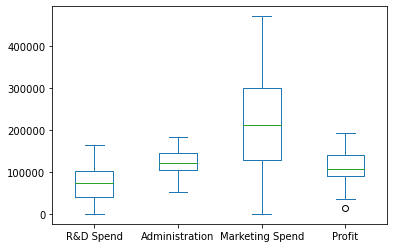

In [6]:
data.plot(kind="box")
plt.show()

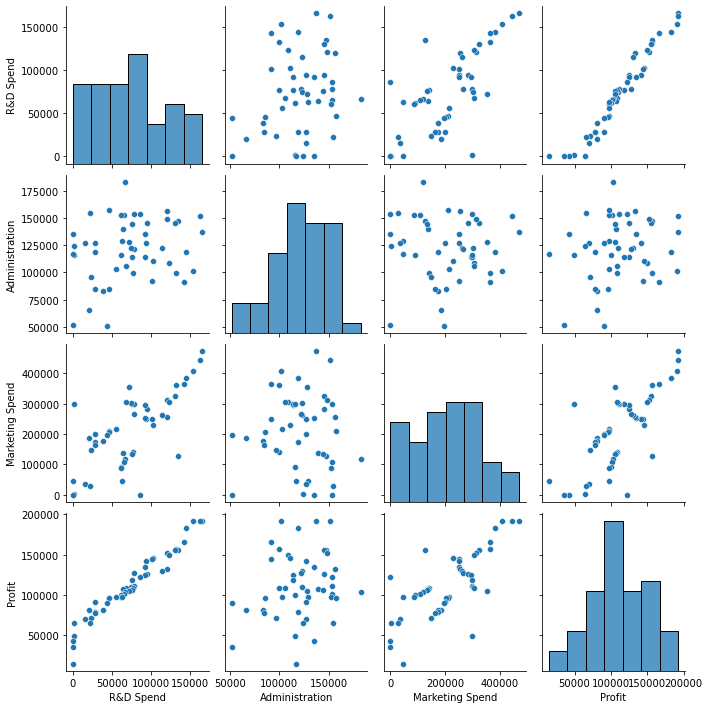

In [7]:
sns.pairplot(data)

In [8]:
data1=data.rename({"R&D Spend":"rd","Administration":"adm","Marketing Spend":"mrkt"},axis=1)
data1.head()

,rd,adm,mrkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
data1.corr()

,rd,adm,mrkt,Profit
rd,1.000000,0.241955,0.724248,0.972900
adm,0.241955,1.000000,-0.032154,0.200717
mrkt,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
data["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

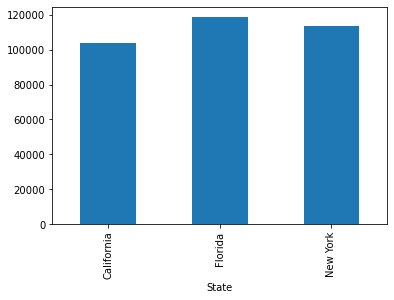

In [11]:
mx=data.groupby(["State"]) ["Profit"].mean().plot(kind="bar")

In [12]:
model=smf.ols("Profit~rd+adm+mrkt",data=data1).fit()

In [13]:
model.params

Intercept    50122.192990
rd               0.805715
adm             -0.026816
mrkt             0.027228
dtype: float64

In [14]:
print(model.tvalues,"\n",model.pvalues)

Intercept     7.626218
rd           17.846374
adm          -0.525507
mrkt          1.655077
dtype: float64 
 Intercept    1.057379e-09
rd           2.634968e-22
adm          6.017551e-01
mrkt         1.047168e-01
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [16]:
mladm=smf.ols("Profit~adm",data=data1).fit()
print(mladm.tvalues,"\n",mladm.pvalues)

Intercept    3.040044
adm          1.419493
dtype: float64 
 Intercept    0.003824
adm          0.162217
dtype: float64


In [17]:
mlmrkt=smf.ols("Profit~mrkt",data=data1).fit()
print(mlmrkt.tvalues,"\n",mlmrkt.pvalues)

Intercept    7.808356
mrkt         7.802657
dtype: float64 
 Intercept    4.294735e-10
mrkt         4.381073e-10
dtype: float64


In [18]:
mlrd=smf.ols("Profit~adm+mrkt",data=data1).fit()
print(mlrd.tvalues,"\n",mlrd.pvalues)

Intercept    1.142741
adm          2.467779
mrkt         8.281039
dtype: float64 
 Intercept    2.589341e-01
adm          1.729198e-02
mrkt         9.727245e-11
dtype: float64


In [19]:
rsq_r=smf.ols("rd~adm+mrkt",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("adm~rd+mrkt",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("mrkt~rd+adm",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['rd','adm','mrkt'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,rd,2.468903
1,adm,1.175091
2,mrkt,2.326773


C:\Users\suraj\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


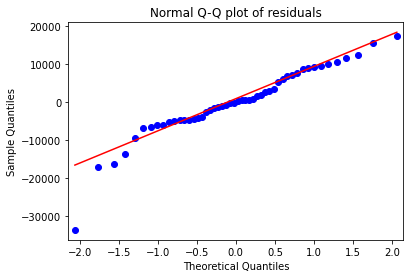

In [20]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

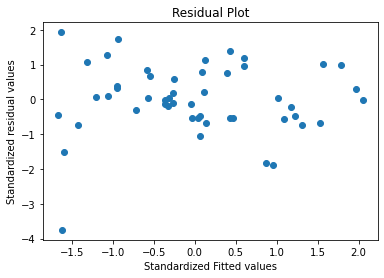

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

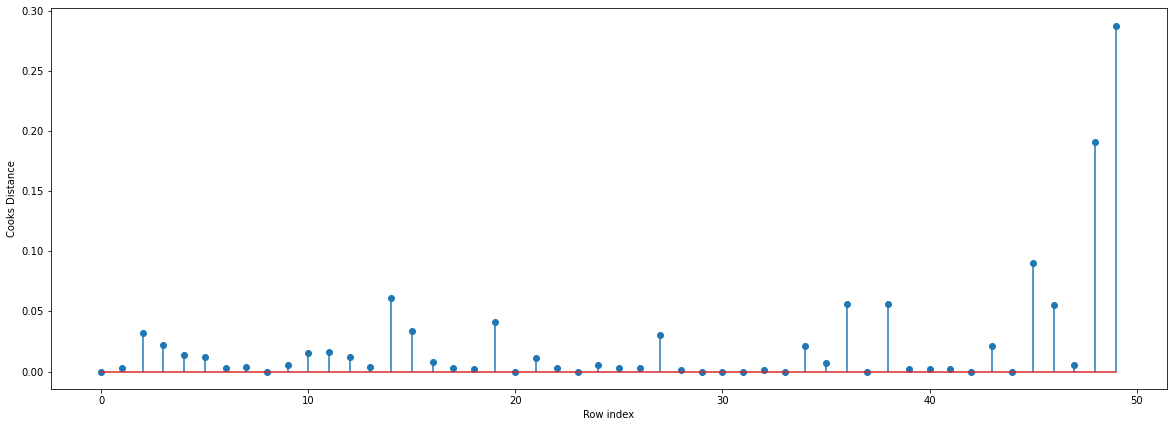

In [25]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432623)

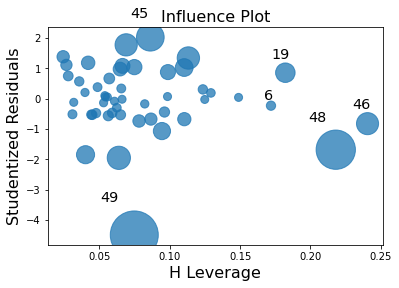

In [27]:
influence_plot(model)
plt.show()

In [28]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [29]:
data1[data1.index.isin([49])]

,rd,adm,mrkt,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [30]:
 data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2.head()

,rd,adm,mrkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
model2=smf.ols("Profit~rd+adm+mrkt",data=data2).fit()

In [32]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~rd+adm+mrkt",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~rd+adm+mrkt",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.98771919355472
Thus model accuracy is improved 

In [33]:
final_model.rsquared 

0.9882757054424702

In [34]:
data2

,rd,adm,mrkt,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


In [35]:
new_data=pd.DataFrame({'rd':100000,"adm":500000,"mrkt":140000},index=[0])
new_data

,rd,adm,mrkt
0,100000,500000,140000


In [36]:
final_model.predict(new_data)

0    136177.026541
dtype: float64

In [37]:
pred_y=final_model.predict(data2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [38]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


# Actual vs predicted graph 

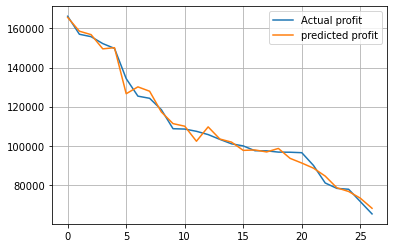

In [72]:
plt.plot(data2.Profit , label="Actual profit")
plt.plot(pred_y, label="predicted profit")
plt.grid(True)
legend=plt.legend()
plt.show()

# Lasso 

In [42]:
x= data2.iloc[:,:3]
y= data2.iloc[:,-1]

In [45]:
from sklearn.model_selection import train_test_split
train_x , test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [47]:
from sklearn import linear_model

In [50]:
lasso_reg= linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)

In [52]:
lasso_reg.fit(train_x, train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [54]:
lasso_reg.score(train_x,train_y)

0.990761570201858

In [56]:
lasso_reg.score(test_x,test_y)

0.9482603962478418

# Ridge

In [58]:
from sklearn.linear_model import Ridge

In [60]:
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)

In [62]:
ridge_reg.fit(train_x, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [64]:
ridge_reg.score(train_x,train_y)

0.9926148564459338

In [65]:
ridge_reg.score(test_x,test_y)

0.963486217892734